### Hierarchical Clustering

##### - Hierarchical Clustering is another commonly used unsupervised machine Learning technique for Data Clustering.It can be broadly divided into two types:

#### Agglomerative Clustering
#### Divisive Clustering

#### Agglomerative Clustering
  Agglomerative clustering follows a bottom-up approach, where individual data points are clustered together to form
multiple small clusters leading to a big cluster, which can then be divided into small clusters using dendrograms.

#### Divisive Clustering
  On the other hand, in the case of divisive clustering, you have one big cluster, which you divide into N number of small clusters.

#### Steps for Hierarchical Agglomerative Clustering.
The steps required to perform agglomerative clustering are as follows:
1. Consider each data point in the dataset as one cluster. Hence, the number of
in the beginning is equal to the number of data points.
2. Join the two closest data points to form a cluster.
3. Form more clusters by joining the closest clusters. Repeat this process until
cluster is formed.
4. Use dendrograms to divide the one big cluster into multiple small clusters. 

#### Why Use Hierarchical Clustering?
Hierarchical clustering has the following advantages:
1. Unlike K Means clustering, for hierarchical clustering, you do not have to sp the number of centroids clustering.
2. With dendrograms, it is easier to interpret how data has been clustered.

#### Disadvantages of Hierarchical Clustering Algorithm
The following are some of the disadvantages of the hierarchical clustering algorithm:
1. Doesn’t scale well on unseen data.
2. Has higher time complexity compared to K Means clustering.
3. Difficult to determine the number of clusters in case of a large dataset.

##### Clustering Dummy Data
First, we will see how to perform hierarchical clustering on dummy data, and then
we will perform hierarchical clustering on Iris data. In the first example, we will perform agglomerative clustering of 10 2-dimensional
data points only.

In [3]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn.datasets  import make_blobs
from matplotlib import pyplot as plt
%matplotlib inline

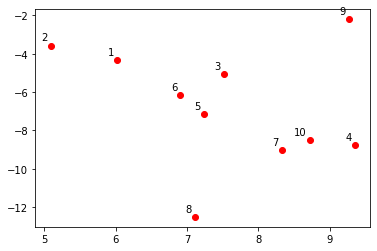

In [9]:
# The following script randomly creates data points and then labels the data points from 1 to 10. The data points are plotted as a scatter plot.

# generating dummy data of 10 records with 2 clusters
features, labels = make_blobs(n_samples=10, centers=2, cluster_std = 2.00)

#plotting the dummy data
plt.scatter(features[:,0], features[:,1], color ='r' )

#adding numbers to data points
annots = range(1, 11)
for label, x, y in zip(annots, features[:, 0], features[:, 1]):
               plt.annotate(
                            label,
                            xy=(x, y), xytext=(-3, 3),
                            textcoords='offset points' , ha='right' , va='bottom' )
plt.show()

From the output above, it can be clearly seen that the data points 1, 2, 3, 5, and 10 belong to one cluster 
and the data points 4, 6, 7, 8, and 9 belong to the other cluster.

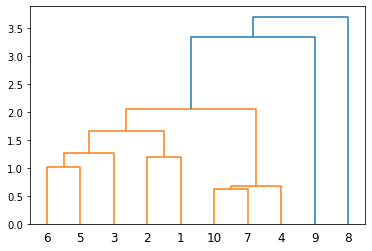

In [11]:
# Let’s now plot dendrograms for the above 10 data points.
from scipy.cluster.hierarchy import dendrogram, linkage 
dendos = linkage(features, 'single' )
annots = range(1, 11)
dendrogram(dendos,
                       orientation='top' ,
                       labels=annots,
                       distance_sort='descending' ,
                       show_leaf_counts=True)
plt.show()

From the figure above, it can be seen that points 1 and 5 are closest to each other. Hence, a cluster is formed by connecting these points.
The cluster of 1 and 5 is closest to data point 10, resulting in a cluster containing points 1, 5, and 10. In the same way,
the remaining clusters are formed until a big cluster is formed.

In [13]:
# Applying agglomerative clustering to our dummy dataset.

from sklearn.cluster import AgglomerativeClustering

# training agglomerative clustering model
hc_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward' )
hc_model.fit_predict(features)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

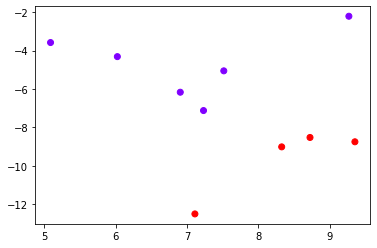

In [15]:
# plot the predicted clusters.

plt.scatter(features[:,0], features[:,1], c= hc_model.labels_, cmap='rainbow')

In the previous example, we had 10 data points with 2 clusters. Let’s now see an example with 500 data points. 
The following line of code creates 500 data points with 4 cluster centers.

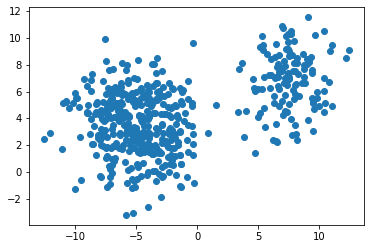

In [16]:
# generating dummy data of 500 records with 4 clusters
features, labels = make_blobs(n_samples=500, centers=4, cluster_std = 2.00)
#plotting the dummy data
plt.scatter(features[:,0], features[:,1] )

In [18]:
# Application of agglomerative hierarchical clustering on the dataset.The number of predicted clusters is 4.

# performing kmeans clustering using AgglomerativeClustering class
hc_model = AgglomerativeClustering(n_clusters=4, affinity= 'euclidean' , linkage='ward' )
hc_model.fit_predict(features)

array([2, 1, 1, 2, 1, 0, 1, 0, 3, 1, 2, 3, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0,
       1, 0, 1, 3, 0, 0, 2, 3, 2, 3, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       3, 0, 1, 2, 0, 0, 0, 0, 1, 3, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1,
       2, 1, 0, 1, 1, 1, 3, 2, 1, 0, 1, 3, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 1, 1, 1, 0, 3, 0, 0, 0, 1, 1, 0,
       2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 3, 0, 0, 1, 1, 0,
       1, 3, 0, 0, 0, 0, 1, 3, 0, 0, 3, 3, 1, 0, 3, 2, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 3, 2, 1, 1, 1, 0, 0,
       0, 2, 0, 1, 2, 1, 0, 3, 1, 1, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 3, 0,
       0, 0, 0, 2, 1, 3, 3, 0, 2, 1, 3, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       1, 2, 0, 2, 1, 2, 2, 3, 1, 2, 0, 0, 2, 0, 1, 1, 3, 1, 1, 0, 3, 0,
       0, 2, 0, 3, 2, 0, 0, 0, 3, 1, 1, 3, 0, 0, 3, 3, 2, 3, 0, 3, 1, 3,
       2, 0, 3, 0, 1, 1, 3, 1, 2, 3, 3, 2, 0, 0, 1, 1, 0, 2, 0, 3, 2, 1,
       1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,

The output shows the labels of some of the data points in our dataset. You can see that since there are 4 clusters,
there are 4 unique labels, i.e., 0, 1, 2, and 3.

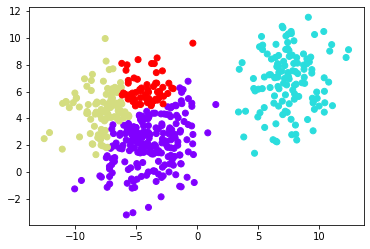

In [20]:
# Plot the predicted clusters.

#pring the data points
plt.scatter(features[:,0], features[:,1], c= hc_model.labels_, cmap='rainbow' )

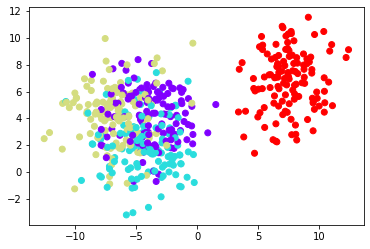

In [22]:
# Similarly, plot the actual clusters in the dataset (for the sake of comparison),

#print actual datapoints
plt.scatter(features[:,0], features[:,1], c= labels, cmap='rainbow' )

In this section, you will see how to cluster the Iris dataset using hierarchical agglomerative clustering.

In [24]:
# import the Iris dataset and display the first five rows of the dataset.

import seaborn as sns
iris_df = sns.load_dataset("iris" )
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
# Divide the data into features and labels sets and display the first five rows of the labels set.

# dividing data into features and labels
features = iris_df.drop(["species" ], axis = 1)
labels = iris_df.filter(["species" ], axis = 1)
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# Apply agglomerative clustering on the feature set using the AgglomerativeClustering class from the sklearn.cluster module.

# training Hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering

# training agglomerative clustering model
features = features.values
hc_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean' , linkage='ward' )
hc_model.fit_predict(features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

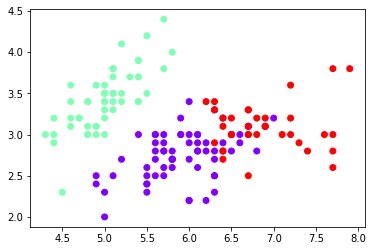

In [30]:
# The predicted clusters are printed via the following script.

#pring the data points
plt.scatter(features[:,0], features[:,1], c= hc_model.labels_, cmap='rainbow' )

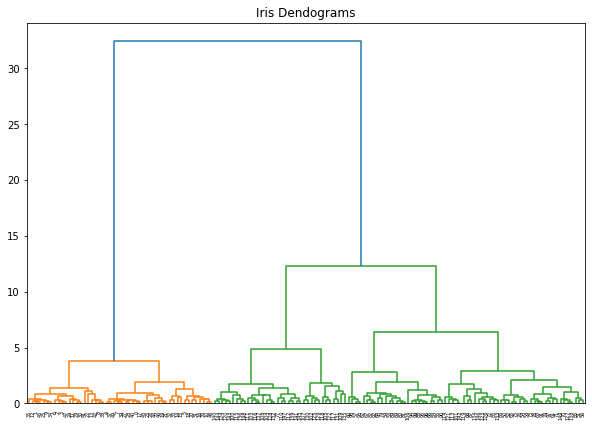

In [32]:
# create dendrograms using the feature set
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Iris Dendograms" )
dend = shc.dendrogram(shc.linkage(features, method='ward' ))

In [ ]:
If you want to cluster the dataset into three clusters, you can simply draw a horizontal line that passes through the three vertical lines. The
clusters below the horizontal line are the resultant clusters.